In [58]:
## Import DataSet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv("E:\\projects\\Housing Prices\\train.csv")
test = pd.read_csv("E:\\projects\\Housing Prices\\test.csv")

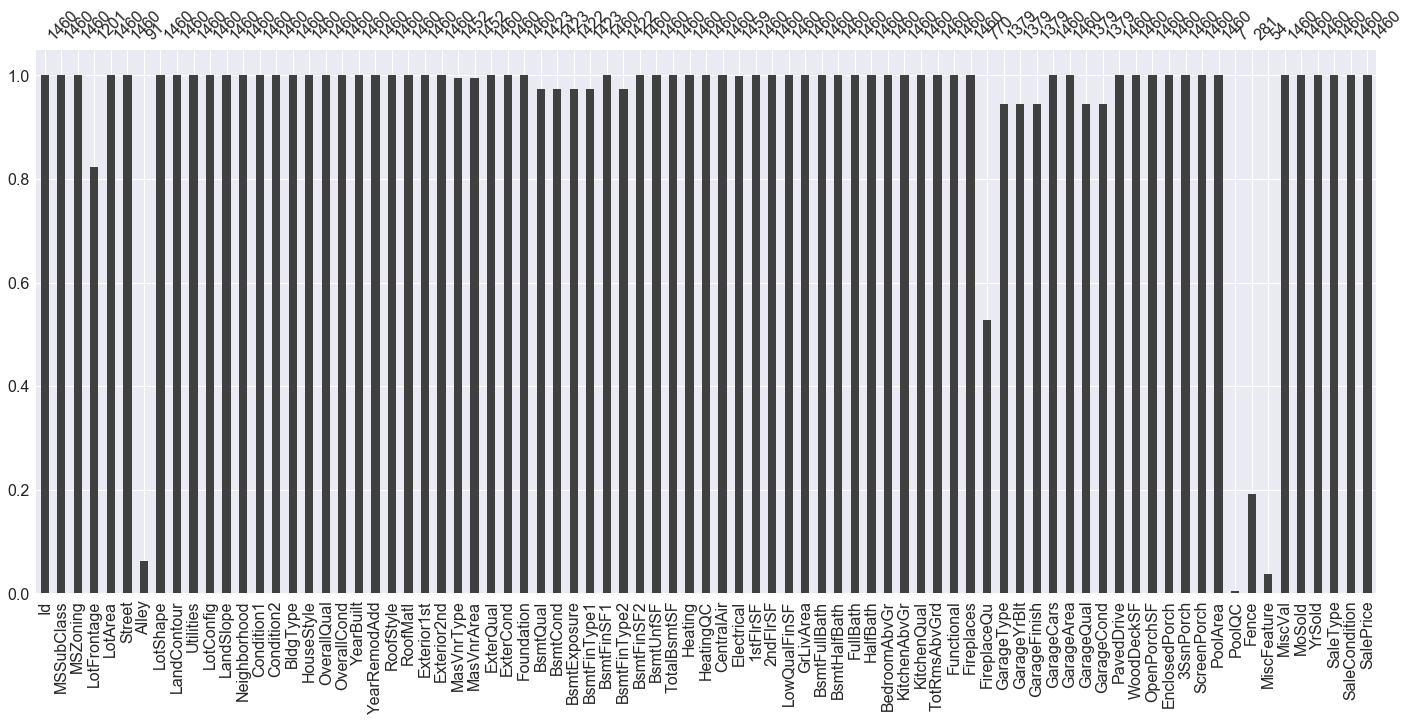

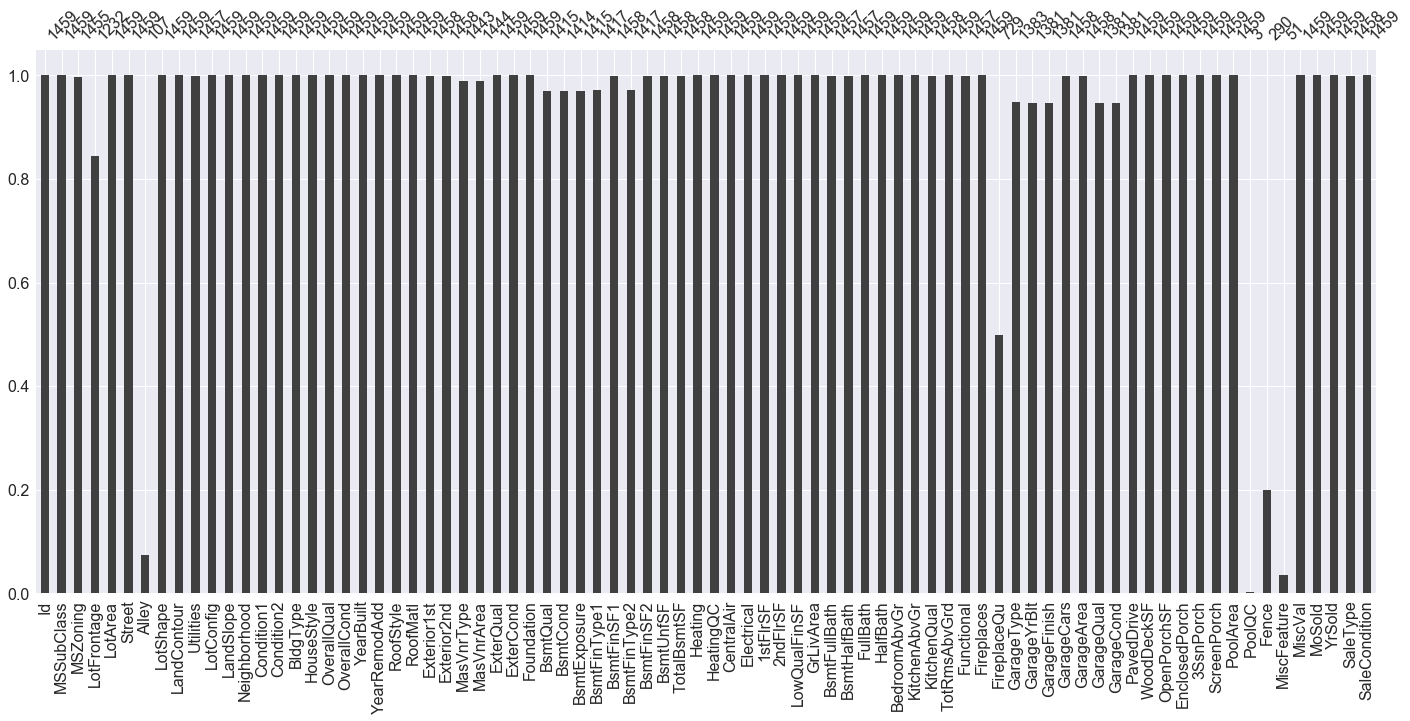

In [59]:
## Visualization of missing values
import missingno as msno
msno.bar(train)
msno.bar(test)
# There are missing values for columns like Alley,PoolQC,BsmtQual,BsmtCond,BsmtExposure,BsmtFinsSF1,BsmtFinsSF2,FirePlaceQu and Fence variables

In [60]:
## Finding missing values
train.isnull().sum()
test.isnull().sum()

## Deleting columns with most missing values
del train['Alley']
del train['PoolQC']
del train['Fence']
del train['MiscFeature']

del test['Alley']
del test['PoolQC']
del test['Fence']
del test['MiscFeature']
del test['Id']

In [61]:
## label Encoding and Impute missing values for categorical datatype
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy = 'median',axis = 0)
imp1 = Imputer(missing_values='NaN',strategy = 'mean',axis = 0)
cat_imp = Imputer(missing_values='NaN',strategy = 'most_frequent',axis = 0)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encode = LabelEncoder()

def lb_imp(x):
    if train[x].dtype == 'object':
        if train[x].isnull().any():
            train[x][train[x].notnull()] = encode.fit_transform(train[x][train[x].notnull()])
            train[x] = cat_imp.fit_transform(train[x].values.reshape(-1,1))

        elif train[x].notnull().all():
            train[x] = encode.fit_transform(train[x].values.reshape(-1,1))
            

def lb_imp_test(x):
    if test[x].dtype == 'object':
        if test[x].isnull().any():
            test[x][test[x].notnull()] = encode.fit_transform(test[x][test[x].notnull()])
            test[x] = cat_imp.fit_transform(test[x].values.reshape(-1,1))
            
        elif test[x].notnull().all():
            test[x] = encode.fit_transform(test[x].values.reshape(-1,1))
            


for i in train.loc[:,train.dtypes=='object'].columns.values:
    lb_imp(i)

for i in test.loc[:,test.dtypes=='object'].columns.values:
    lb_imp_test(i)

# Encoding categorical variables by Label Encoder and Imputing missing values with most frequent values

C:\Users\Raghavendran\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Raghavendran\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Raghavendran\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [62]:
## Boxplot for columns with missing values
import seaborn as sns
sns.boxplot(train['LotFrontage']) # Outliers more
sns.boxplot(train['GarageYrBlt']) # No outliers
sns.boxplot(train['MasVnrArea']) # Outliers more

sns.boxplot(test['LotFrontage'])
sns.boxplot(test['MasVnrArea'])
sns.boxplot(test['GarageYrBlt'])
sns.boxplot(test['BsmtFullBath'])
sns.boxplot(test['BsmtHalfBath'])
sns.boxplot(test['BsmtFinSF1'])
sns.boxplot(test['BsmtFinSF2'])
sns.boxplot(test['BsmtUnfSF'])
sns.boxplot(test['TotalBsmtSF'])
sns.boxplot(test['GarageCars'])
sns.boxplot(test['GarageArea'])

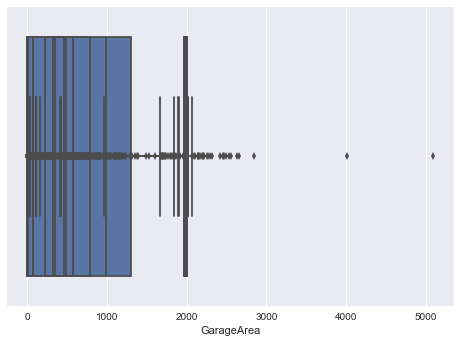

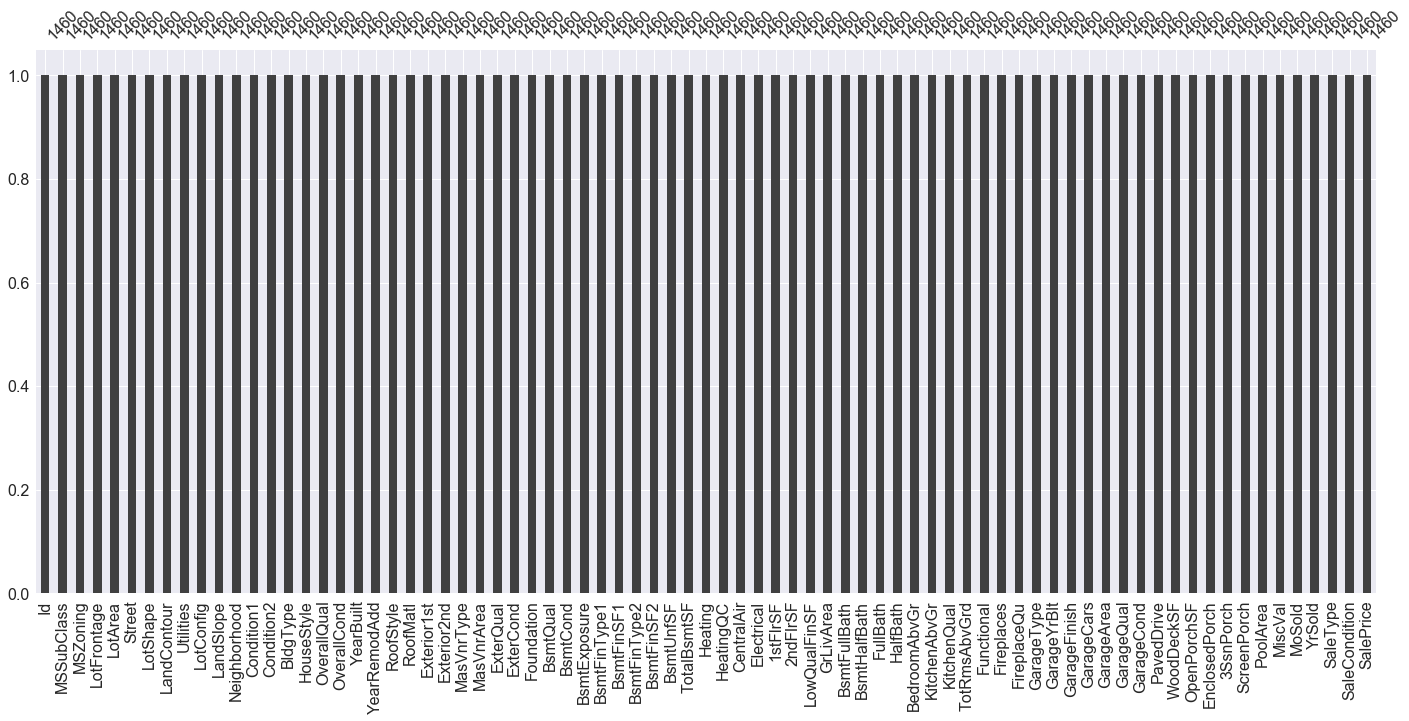

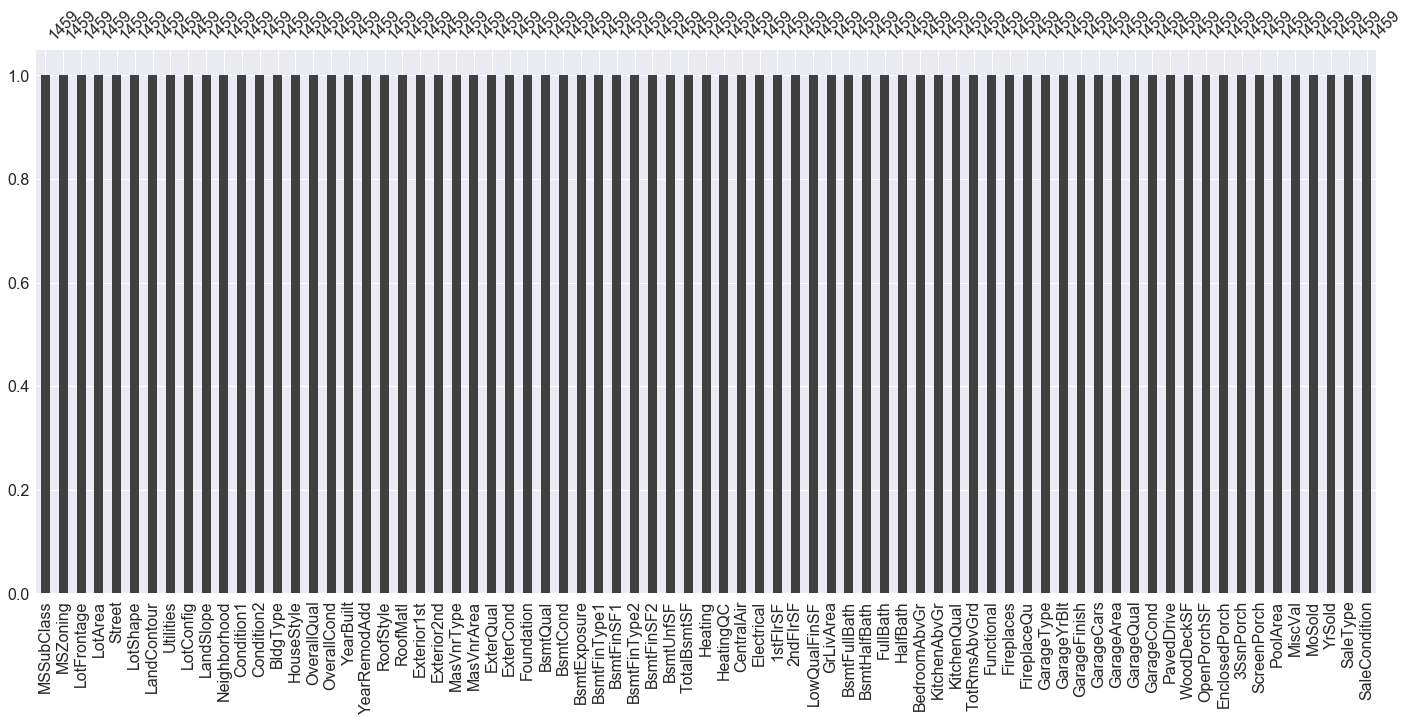

In [63]:
## Imputing numerical variables
train['LotFrontage'] = imp.fit_transform(train['LotFrontage'].values.reshape(-1,1))
train['MasVnrArea'] = imp.fit_transform(train['MasVnrArea'].values.reshape(-1,1))
train['GarageYrBlt'] = imp1.fit_transform(train['GarageYrBlt'].values.reshape(-1,1))

test['LotFrontage'] = imp.fit_transform(test['LotFrontage'].values.reshape(-1,1))
test['MasVnrArea'] = imp.fit_transform(test['MasVnrArea'].values.reshape(-1,1))
test['GarageYrBlt'] = imp1.fit_transform(test['GarageYrBlt'].values.reshape(-1,1))
test['BsmtFullBath'] = imp.fit_transform(test['BsmtFullBath'].values.reshape(-1,1))
test['BsmtHalfBath'] = imp.fit_transform(test['BsmtHalfBath'].values.reshape(-1,1))
test['BsmtFinSF1'] = imp.fit_transform(test['BsmtFinSF1'].values.reshape(-1,1))
test['BsmtFinSF2'] = imp.fit_transform(test['BsmtFinSF2'].values.reshape(-1,1))
test['BsmtUnfSF'] = imp.fit_transform(test['BsmtUnfSF'].values.reshape(-1,1))
test['TotalBsmtSF'] = imp.fit_transform(test['TotalBsmtSF'].values.reshape(-1,1))
test['GarageCars'] = imp.fit_transform(test['GarageCars'].values.reshape(-1,1))
test['GarageArea'] = imp.fit_transform(test['GarageArea'].values.reshape(-1,1))

# Impute missing values with mean/median numerical variables

## Verifying missing values
msno.bar(train)
msno.bar(test)

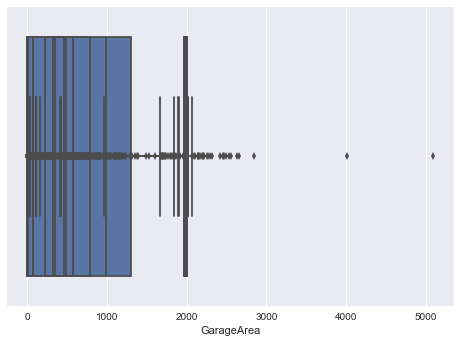

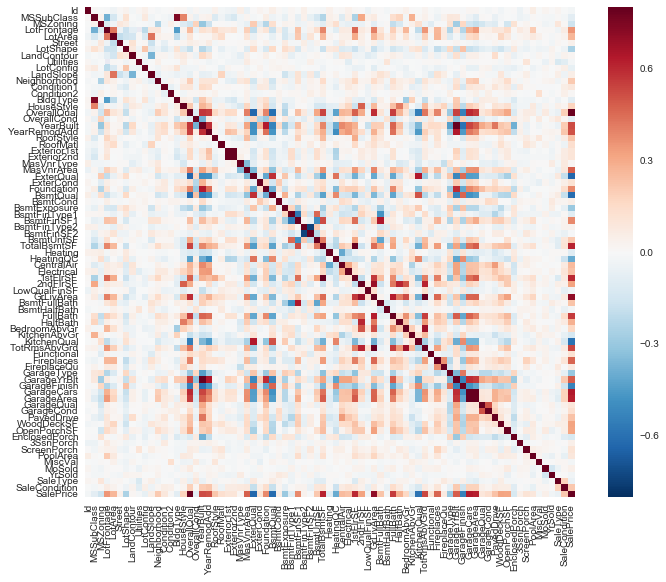

In [53]:
## Correlation Plot
corr_train = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_train,vmax=.8,square=True)
plt.show()

In [65]:
## Splitting up the dataset
X = train.iloc[:,1:76]
y = train.iloc[:,76]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:,X_train.dtypes!='object'] = sc.fit_transform(X_train.loc[:,X_train.dtypes!='object'])
X_test.loc[:,X_test.dtypes!='object'] = sc.transform(X_test.loc[:,X_test.dtypes!='object'])
test.loc[:,test.dtypes!='object'] = sc.transform(test.loc[:,test.dtypes!='object'])

C:\Users\Raghavendran\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [66]:
## Regression Techniques

# Linear Regression
from sklearn.linear_model import LinearRegression,Ridge
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)

pred = lin_mod.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,pred)
mean_squared_error(y_test,pred)

# Ridge Regression
rig_mod = Ridge(alpha = .5)
rig_mod.fit(X_train,y_train)

pred1 = rig_mod.predict(X_test)

r2_score(y_test,pred1)

# Gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              }
est = GradientBoostingRegressor(n_estimators=500)

gridsearch = GridSearchCV(est, param_grid, n_jobs=4)

gridsearch.fit(X_train,y_train)

pred2 = gridsearch.predict(X_test)

r2_score(y_test,pred2)

# Final test data prediction

final_pred = gridsearch.predict(test)
final_pred

# The accuracy is 86% for Gradient Boosting with GridsearchCV.

array([ 125235.93806765,  153495.50176214,  189290.66901407, ...,
        160643.28196925,  116735.67150192,  218709.75055389])